### ECHO Idaho Email Campaign Data

The purpose of this analysis is to clean and visualize all of the ECHO Idaho email data from the University of Idaho's email platform (MailChimp). 

In [1]:
#import dependencies
import pandas as pd
import os
import numpy as np
from datetime import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

In [2]:
#name the current filepath
cwd = os.getcwd()
cwd

'C:\\Users\\ssteffen\\University of Idaho\\Storage-Boise - ECHO\\Staff\\Sam\\Data\\Projects\\ECHO-Marketing_git'

# ECHO MailChimp Email Data

In [3]:
#name the filepath to the data
# former_file_path = "C:\\Users\\ssteffen\\Desktop\\Sam\\Email_data\\email_data.csv"
#to get the current file path, enter 'pwd' in GitBash terminal:
# /c/Users/ssteffen/University of Idaho/Storage-Boise - ECHO/Staff/Sam/Data
data_file_path = 'C:\\Users\\ssteffen\\University of Idaho\\Storage-Boise - ECHO\\Staff\\Sam\\Data\\Spreadsheets\\Email data\\email_data.csv' 

# read the data into a dataframe
email_data_df = pd.read_csv(data_file_path)
email_data_df.head()

,Title,Series,Type,Subject,List,Send Date-time,Send Date,Send Time (PT),Send Weekday,Total Recipients,...,New Visits,Pages/Visit,Bounce Rate,Time on Site,Goal Conversion Rate,Per Visit Goal Value,Transactions,Ecommerce Conversion Rate,Per Visit Value,Average Value
0,WWAMI - ECHO - 3/15 Reminder,BH in PC,Daily,ECHO Idaho Opioid Clinic Thursday,University of Idaho - To Be Deleted,3/13/2018 14:59,3/13/2018,14:59:00,Tuesday,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,WWAMI - ECHO - 3/15 Reminder to Enrolled,BH in PC,Daily,ECHO Idaho Opioid Clinic Thursday,University of Idaho - To Be Deleted,3/13/2018 16:28,3/13/2018,16:28:00,Tuesday,55,...,0.0,5.0,0.0,23:02,0.00%,$0.00,0.0,0.00%,$0.00,$0.00
2,WWAMI - ECHO - EnrollConfirm 05-30-18,BH in PC,Daily,Enrollment Confirmation: ECHO IdahoÃ¢â‚¬â„¢s O...,University of Idaho - To Be Deleted,5/30/2018 8:11,5/30/2018,8:11:00,Wednesday,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,WWAMI - ECHO - Behavioral Health Announcement,BH in PC,Special - General,Announcing ECHO IdahoÃ¢â‚¬â„¢s Behavioral Heal...,University of Idaho - To Be Deleted,7/20/2018 10:04,7/20/2018,10:04:00,Friday,39,...,7.0,4.4,0.4,7:20,0.00%,$0.00,0.0,0.00%,$0.00,$0.00
4,WWAMI - ECHO - Behavioral Health Announcement ...,BH in PC,Special - General,Announcing ECHO IdahoÃ¢â‚¬â„¢s Behavioral Heal...,University of Idaho - To Be Deleted,7/20/2018 11:16,7/20/2018,11:16:00,Friday,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#explore the data columns to determine what to keep and what to drop
print(email_data_df.columns)

Index(['Title', 'Series', 'Type', 'Subject', 'List', 'Send Date-time',
       'Send Date', 'Send Time (PT)', 'Send Weekday', 'Total Recipients',
       'Successful Deliveries', 'Soft Bounces', 'Hard Bounces',
       'Total Bounces', 'Times Forwarded', 'Forwarded Opens', 'Unique Opens',
       'Open Rate', 'Total Opens', 'Unique Clicks', 'Click Rate',
       'Total Clicks', 'Unsubscribes', 'Abuse Complaints',
       'Times Liked on Facebook', 'Folder Id', 'Unique Id', 'Total Orders',
       'Total Gross Sales', 'Total Revenue', 'Analytics ROI', 'Campaign Cost',
       'Revenue Created', 'Visits', 'New Visits', 'Pages/Visit', 'Bounce Rate',
       'Time on Site', 'Goal Conversion Rate', 'Per Visit Goal Value',
       'Transactions', 'Ecommerce Conversion Rate', 'Per Visit Value',
       'Average Value'],
      dtype='object')


## NOTE:
Because the data was either incomplete, irrelevant, or unclear, the following columns were dropped from the collected dataset:

In [5]:
#drop unnecessary columns
email_data_df = email_data_df.drop(['List',
                                    'Send Date-time',
                                    'Soft Bounces',
                                    'Hard Bounces',
                                    'Abuse Complaints',
                                    'Folder Id',
                                    'Unique Id',
                                    'Total Orders',
                                    'Total Gross Sales',
                                    'Total Revenue',
                                    'Analytics ROI',
                                    'Campaign Cost',
                                    'Revenue Created',
                                    'Goal Conversion Rate',
                                    'Per Visit Goal Value',
                                    'Transactions',
                                    'Ecommerce Conversion Rate',
                                    'Per Visit Value',
                                    'Average Value',
                                    'Time on Site'
                                   ], axis=1)
email_data_df

,Title,Series,Type,Subject,Send Date,Send Time (PT),Send Weekday,Total Recipients,Successful Deliveries,Total Bounces,...,Total Opens,Unique Clicks,Click Rate,Total Clicks,Unsubscribes,Times Liked on Facebook,Visits,New Visits,Pages/Visit,Bounce Rate
0,WWAMI - ECHO - 3/15 Reminder,BH in PC,Daily,ECHO Idaho Opioid Clinic Thursday,3/13/2018,14:59:00,Tuesday,1,1,0.0,...,1,0,0.00,0,0,0.0,NaN,NaN,NaN,NaN
1,WWAMI - ECHO - 3/15 Reminder to Enrolled,BH in PC,Daily,ECHO Idaho Opioid Clinic Thursday,3/13/2018,16:28:00,Tuesday,55,55,0.0,...,290,20,0.36,73,0,0.0,1.0,0.0,5.000000,0.00
2,WWAMI - ECHO - EnrollConfirm 05-30-18,BH in PC,Daily,Enrollment Confirmation: ECHO IdahoÃ¢â‚¬â„¢s O...,5/30/2018,8:11:00,Wednesday,6,5,1.0,...,10,2,0.40,2,0,0.0,NaN,NaN,NaN,NaN
3,WWAMI - ECHO - Behavioral Health Announcement,BH in PC,Special - General,Announcing ECHO IdahoÃ¢â‚¬â„¢s Behavioral Heal...,7/20/2018,10:04:00,Friday,39,39,0.0,...,587,7,0.18,49,0,0.0,20.0,7.0,4.400000,0.40
4,WWAMI - ECHO - Behavioral Health Announcement ...,BH in PC,Special - General,Announcing ECHO IdahoÃ¢â‚¬â„¢s Behavioral Heal...,7/20/2018,11:16:00,Friday,4,4,0.0,...,0,0,0.00,0,0,0.0,NaN,NaN,NaN,NaN
5,WWAMI - ECHO - Behavioral Health Registration ...,BH in PC,Daily,Registration Now Open for ECHO IdahoÃ¢â‚¬â„¢s ...,8/1/2018,10:40:00,Wednesday,185,182,3.0,...,999,33,0.18,91,1,0.0,64.0,19.0,2.531250,0.47
6,WWAMI - ECHO - 09-05 BH Reminder,BH in PC,Daily,ECHO Idaho Behavioral Health in Primary Care S...,9/4/2018,8:00:00,Tuesday,59,59,0.0,...,165,27,0.46,93,0,0.0,9.0,3.0,5.222222,0.33
7,WWAMI - ECHO - 09-05 BH Reminder 2,BH in PC,Daily,ECHO Idaho Behavioral Health in Primary Care S...,9/5/2018,8:39:00,Wednesday,59,54,5.0,...,146,28,0.52,90,0,0.0,NaN,NaN,NaN,NaN
8,WWAMI - ECHO - 09-18 BH Reminder,BH in PC,Daily,ECHO Idaho Behavioral Health in Primary Care S...,9/18/2018,8:26:00,Tuesday,57,55,2.0,...,104,18,0.33,36,0,0.0,3.0,1.0,1.333333,0.67
9,WWAMI - ECHO - 09-18 BH Reminder (copy 01),BH in PC,Daily,ECHO Idaho Behavioral Health in Primary Care S...,9/19/2018,8:28:00,Wednesday,57,55,2.0,...,204,24,0.44,57,0,0.0,NaN,NaN,NaN,NaN


In [6]:
#examine the series and types
email_data_df['Series'].value_counts()

Weekly        218
OPSUD         130
BH in PC      108
COVID          70
VHLC           32
PALTC          31
CTSUDs         27
PSUD           21
PedsASD        19
XWT            19
Newsletter     10
Special         8
PBH             8
MOUD            3
Syphilis        3
Podcast         1
Name: Series, dtype: int64

In [7]:
# fill in missing data with n/a or zeros
email_data_df.describe()

,Total Recipients,Successful Deliveries,Total Bounces,Times Forwarded,Forwarded Opens,Unique Opens,Open Rate,Total Opens,Unique Clicks,Click Rate,Total Clicks,Unsubscribes,Times Liked on Facebook,Visits,New Visits,Pages/Visit,Bounce Rate
count,708.000000,708.000000,489.000000,489.000000,489.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,489.0,242.000000,242.000000,242.000000,242.000000
mean,924.098870,920.543785,3.196319,0.312883,0.327198,270.725989,0.334661,610.049435,42.114407,0.081808,125.957627,0.686441,0.0,24.801653,10.136364,2.235199,0.599504
std,835.909877,833.232983,3.934180,0.833628,2.280373,239.923175,0.118177,728.561215,28.506922,0.095394,99.899658,1.106998,0.0,56.718219,31.100726,1.219892,0.249824
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,1.000000,0.000000
25%,263.500000,261.250000,1.000000,0.000000,0.000000,85.750000,0.270000,225.500000,20.000000,0.040000,55.750000,0.000000,0.0,5.000000,2.000000,1.466667,0.442500
50%,700.500000,694.000000,2.000000,0.000000,0.000000,220.000000,0.310000,464.000000,38.000000,0.060000,105.000000,0.000000,0.0,11.500000,4.000000,1.894444,0.620000
75%,1346.500000,1340.250000,4.000000,0.000000,0.000000,430.250000,0.360000,848.500000,59.000000,0.090000,168.250000,1.000000,0.0,23.000000,7.000000,2.577068,0.770000
max,3110.000000,3097.000000,26.000000,7.000000,46.000000,1028.000000,1.000000,14464.000000,176.000000,1.000000,778.000000,8.000000,0.0,595.000000,369.000000,8.333333,1.000000


## NOTE: 
The columns 'Total Bounces', 'Times Forwarded', 'Forwarded Opens', 'Times liked on Facebook' each contained 219 missing entries. To proceed with the analysis, the "N/A" values were replaced with 0s.

In [8]:
#replace the NaN values with 0 to proceed with the analysis
email_data_df['Total Bounces'] = email_data_df['Total Bounces'].fillna(0)
email_data_df['Times Forwarded'] = email_data_df['Times Forwarded'].fillna(0)
email_data_df['Forwarded Opens'] = email_data_df['Forwarded Opens'].fillna(0)
email_data_df['Times Liked on Facebook'] = email_data_df['Times Liked on Facebook'].fillna(0)
email_data_df['Visits'] = email_data_df['Visits'].fillna(0)
email_data_df['New Visits'] = email_data_df['New Visits'].fillna(0)
email_data_df['Pages/Visit'] = email_data_df['Pages/Visit'].fillna(0)
email_data_df['Bounce Rate'] = email_data_df['Bounce Rate'].fillna(0)

#check to make sure the dataframe is complete across all columns
email_data_df.describe()

,Total Recipients,Successful Deliveries,Total Bounces,Times Forwarded,Forwarded Opens,Unique Opens,Open Rate,Total Opens,Unique Clicks,Click Rate,Total Clicks,Unsubscribes,Times Liked on Facebook,Visits,New Visits,Pages/Visit,Bounce Rate
count,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.0,708.000000,708.000000,708.000000,708.000000
mean,924.098870,920.543785,2.207627,0.216102,0.225989,270.725989,0.334661,610.049435,42.114407,0.081808,125.957627,0.686441,0.0,8.477401,3.464689,0.764009,0.204915
std,835.909877,833.232983,3.587358,0.707543,1.900585,239.923175,0.118177,728.561215,28.506922,0.095394,99.899658,1.106998,0.0,35.144974,18.784647,1.277836,0.319760
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,263.500000,261.250000,0.000000,0.000000,0.000000,85.750000,0.270000,225.500000,20.000000,0.040000,55.750000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,700.500000,694.000000,1.000000,0.000000,0.000000,220.000000,0.310000,464.000000,38.000000,0.060000,105.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
75%,1346.500000,1340.250000,3.000000,0.000000,0.000000,430.250000,0.360000,848.500000,59.000000,0.090000,168.250000,1.000000,0.0,5.000000,2.000000,1.500000,0.460000
max,3110.000000,3097.000000,26.000000,7.000000,46.000000,1028.000000,1.000000,14464.000000,176.000000,1.000000,778.000000,8.000000,0.0,595.000000,369.000000,8.333333,1.000000


In [9]:
#rename the columns
email_data_df.rename(columns={'Send Date':'Date',
                     'Send Time (PT)':'Time',
                     'Send Weekday':'Weekday',
                     'Times Liked on Facebook':'FB Likes'},
                     inplace=True)

# list(email_data_df.columns.values)

#reorder the columns
email_data_df = email_data_df[['Date','Weekday','Time','Series','Type','Title','Subject',\
    'Total Recipients','Successful Deliveries','Total Bounces','Times Forwarded','Forwarded Opens',\
    'Unique Opens', 'Open Rate', 'Total Opens', 'Unique Clicks','Click Rate', 'Total Clicks', 'Unsubscribes',\
    'FB Likes','Visits','New Visits','Pages/Visit','Bounce Rate']]

email_data_df.head()

,Date,Weekday,Time,Series,Type,Title,Subject,Total Recipients,Successful Deliveries,Total Bounces,...,Total Opens,Unique Clicks,Click Rate,Total Clicks,Unsubscribes,FB Likes,Visits,New Visits,Pages/Visit,Bounce Rate
0,3/13/2018,Tuesday,14:59:00,BH in PC,Daily,WWAMI - ECHO - 3/15 Reminder,ECHO Idaho Opioid Clinic Thursday,1,1,0.0,...,1,0,0.00,0,0,0.0,0.0,0.0,0.0,0.0
1,3/13/2018,Tuesday,16:28:00,BH in PC,Daily,WWAMI - ECHO - 3/15 Reminder to Enrolled,ECHO Idaho Opioid Clinic Thursday,55,55,0.0,...,290,20,0.36,73,0,0.0,1.0,0.0,5.0,0.0
2,5/30/2018,Wednesday,8:11:00,BH in PC,Daily,WWAMI - ECHO - EnrollConfirm 05-30-18,Enrollment Confirmation: ECHO IdahoÃ¢â‚¬â„¢s O...,6,5,1.0,...,10,2,0.40,2,0,0.0,0.0,0.0,0.0,0.0
3,7/20/2018,Friday,10:04:00,BH in PC,Special - General,WWAMI - ECHO - Behavioral Health Announcement,Announcing ECHO IdahoÃ¢â‚¬â„¢s Behavioral Heal...,39,39,0.0,...,587,7,0.18,49,0,0.0,20.0,7.0,4.4,0.4
4,7/20/2018,Friday,11:16:00,BH in PC,Special - General,WWAMI - ECHO - Behavioral Health Announcement ...,Announcing ECHO IdahoÃ¢â‚¬â„¢s Behavioral Heal...,4,4,0.0,...,0,0,0.00,0,0,0.0,0.0,0.0,0.0,0.0


In [10]:
# examine the data types in the columns and make sure they can be manipulated
email_data_df.dtypes

Date                      object
Weekday                   object
Time                      object
Series                    object
Type                      object
Title                     object
Subject                   object
Total Recipients           int64
Successful Deliveries      int64
Total Bounces            float64
Times Forwarded          float64
Forwarded Opens          float64
Unique Opens               int64
Open Rate                float64
Total Opens                int64
Unique Clicks              int64
Click Rate               float64
Total Clicks               int64
Unsubscribes               int64
FB Likes                 float64
Visits                   float64
New Visits               float64
Pages/Visit              float64
Bounce Rate              float64
dtype: object

### Convert the datatypes

In [11]:
#change the data types of inappropriate datatypes, if necessary
email_data_df['Date'] = pd.to_datetime(email_data_df['Date'], format='%m/%d/%Y')
email_data_df['Total Recipients'] = pd.to_numeric(email_data_df['Total Recipients'])
email_data_df['Successful Deliveries'] = pd.to_numeric(email_data_df['Successful Deliveries'])
email_data_df['Total Bounces'] = pd.to_numeric(email_data_df['Total Bounces'])
email_data_df['Times Forwarded'] = pd.to_numeric(email_data_df['Times Forwarded'])
email_data_df['Forwarded Opens'] = pd.to_numeric(email_data_df['Forwarded Opens'])
email_data_df['Open Rate'] = pd.to_numeric(email_data_df['Open Rate'])
email_data_df['Click Rate'] = pd.to_numeric(email_data_df['Click Rate'])
email_data_df['Visits'] = pd.to_numeric(email_data_df['Visits'])
email_data_df['New Visits'] = pd.to_numeric(email_data_df['New Visits'])
email_data_df['Pages/Visit'] = pd.to_numeric(email_data_df['Pages/Visit'])
email_data_df['Bounce Rate'] = pd.to_numeric(email_data_df['Bounce Rate'])

email_data_df.dtypes

Date                     datetime64[ns]
Weekday                          object
Time                             object
Series                           object
Type                             object
Title                            object
Subject                          object
Total Recipients                  int64
Successful Deliveries             int64
Total Bounces                   float64
Times Forwarded                 float64
Forwarded Opens                 float64
Unique Opens                      int64
Open Rate                       float64
Total Opens                       int64
Unique Clicks                     int64
Click Rate                      float64
Total Clicks                      int64
Unsubscribes                      int64
FB Likes                        float64
Visits                          float64
New Visits                      float64
Pages/Visit                     float64
Bounce Rate                     float64
dtype: object

In [12]:
#show TABLE 1: Cleaned Data
email_data_df

,Date,Weekday,Time,Series,Type,Title,Subject,Total Recipients,Successful Deliveries,Total Bounces,...,Total Opens,Unique Clicks,Click Rate,Total Clicks,Unsubscribes,FB Likes,Visits,New Visits,Pages/Visit,Bounce Rate
0,2018-03-13,Tuesday,14:59:00,BH in PC,Daily,WWAMI - ECHO - 3/15 Reminder,ECHO Idaho Opioid Clinic Thursday,1,1,0.0,...,1,0,0.00,0,0,0.0,0.0,0.0,0.000000,0.00
1,2018-03-13,Tuesday,16:28:00,BH in PC,Daily,WWAMI - ECHO - 3/15 Reminder to Enrolled,ECHO Idaho Opioid Clinic Thursday,55,55,0.0,...,290,20,0.36,73,0,0.0,1.0,0.0,5.000000,0.00
2,2018-05-30,Wednesday,8:11:00,BH in PC,Daily,WWAMI - ECHO - EnrollConfirm 05-30-18,Enrollment Confirmation: ECHO IdahoÃ¢â‚¬â„¢s O...,6,5,1.0,...,10,2,0.40,2,0,0.0,0.0,0.0,0.000000,0.00
3,2018-07-20,Friday,10:04:00,BH in PC,Special - General,WWAMI - ECHO - Behavioral Health Announcement,Announcing ECHO IdahoÃ¢â‚¬â„¢s Behavioral Heal...,39,39,0.0,...,587,7,0.18,49,0,0.0,20.0,7.0,4.400000,0.40
4,2018-07-20,Friday,11:16:00,BH in PC,Special - General,WWAMI - ECHO - Behavioral Health Announcement ...,Announcing ECHO IdahoÃ¢â‚¬â„¢s Behavioral Heal...,4,4,0.0,...,0,0,0.00,0,0,0.0,0.0,0.0,0.000000,0.00
5,2018-08-01,Wednesday,10:40:00,BH in PC,Daily,WWAMI - ECHO - Behavioral Health Registration ...,Registration Now Open for ECHO IdahoÃ¢â‚¬â„¢s ...,185,182,3.0,...,999,33,0.18,91,1,0.0,64.0,19.0,2.531250,0.47
6,2018-09-04,Tuesday,8:00:00,BH in PC,Daily,WWAMI - ECHO - 09-05 BH Reminder,ECHO Idaho Behavioral Health in Primary Care S...,59,59,0.0,...,165,27,0.46,93,0,0.0,9.0,3.0,5.222222,0.33
7,2018-09-05,Wednesday,8:39:00,BH in PC,Daily,WWAMI - ECHO - 09-05 BH Reminder 2,ECHO Idaho Behavioral Health in Primary Care S...,59,54,5.0,...,146,28,0.52,90,0,0.0,0.0,0.0,0.000000,0.00
8,2018-09-18,Tuesday,8:26:00,BH in PC,Daily,WWAMI - ECHO - 09-18 BH Reminder,ECHO Idaho Behavioral Health in Primary Care S...,57,55,2.0,...,104,18,0.33,36,0,0.0,3.0,1.0,1.333333,0.67
9,2018-09-19,Wednesday,8:28:00,BH in PC,Daily,WWAMI - ECHO - 09-18 BH Reminder (copy 01),ECHO Idaho Behavioral Health in Primary Care S...,57,55,2.0,...,204,24,0.44,57,0,0.0,0.0,0.0,0.000000,0.00


In [13]:
# TABLE 2: A table of the total emails sent for each series
#create a new dataframe that uses the series as the index
series_totals_df = email_data_df.groupby(email_data_df['Series']).sum()

#add an additional column that counts the number of emails for each series
email_count = email_data_df.groupby(['Series'])['Title'].count()
series_totals_df.insert(0, 'Email Count', email_count)

#arrange the data in descending order
series_totals_df = series_totals_df.sort_values(by='Email Count', ascending=False)

#show the table
series_totals_df

,Email Count,Total Recipients,Successful Deliveries,Total Bounces,Times Forwarded,Forwarded Opens,Unique Opens,Open Rate,Total Opens,Unique Clicks,Click Rate,Total Clicks,Unsubscribes,FB Likes,Visits,New Visits,Pages/Visit,Bounce Rate
Series,,,,,,,,,,,,,,,,,,
Weekly,218,314856,313681,727.0,66.0,91.0,89927,69.35,192407,9966,11.18,29107,267,0.0,1960.0,663.0,207.592715,51.89
OPSUD,130,86816,86480,269.0,31.0,26.0,24720,42.53,63814,5175,13.26,14860,57,0.0,1557.0,800.0,112.463572,31.73
BH in PC,108,65499,65280,145.0,16.0,12.0,20286,39.72,47288,4405,12.41,13281,34,0.0,633.0,204.0,104.024425,26.61
COVID,70,69544,69296,160.0,25.0,23.0,21276,23.13,44433,4340,5.19,12681,42,0.0,275.0,81.0,46.081762,13.30
VHLC,32,11303,11268,4.0,1.0,2.0,3544,10.05,6751,488,1.92,1580,5,0.0,0.0,0.0,0.000000,0.00
PALTC,31,16521,16410,111.0,9.0,2.0,5214,9.49,13692,1278,2.89,4453,11,0.0,537.0,214.0,15.888400,3.27
CTSUDs,27,18097,18040,1.0,0.0,0.0,5948,8.84,11784,989,1.54,2667,9,0.0,0.0,0.0,0.000000,0.00
PSUD,21,4862,4833,29.0,2.0,0.0,1818,8.69,4492,620,3.75,1870,4,0.0,232.0,51.0,18.098088,6.29
PedsASD,19,17186,17115,0.0,0.0,0.0,5826,7.29,11835,1173,1.92,4031,12,0.0,0.0,0.0,0.000000,0.00


In [14]:
series = list(series_totals_df.index.values)
series

['Weekly',
 'OPSUD',
 'BH in PC',
 'COVID',
 'VHLC',
 'PALTC',
 'CTSUDs',
 'PSUD',
 'PedsASD',
 'XWT',
 'Newsletter',
 'PBH',
 'Special',
 'MOUD',
 'Syphilis',
 'Podcast']

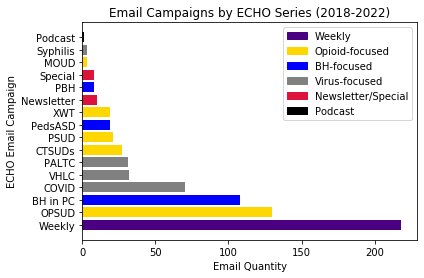

In [15]:
#Visualize Table #2 w/matplotlib for 2018-2022
email_count = series_totals_df['Email Count']
series = list(series_totals_df.index.values)

plt.barh(series, email_count, color=['indigo','gold','blue','grey','grey','grey','gold','gold','blue','gold','crimson','blue','crimson','gold','grey','black'])
plt.title("Email Campaigns by ECHO Series (2018-2022)")
plt.xlabel("Email Quantity")
plt.ylabel("ECHO Email Campaign")

#create a legend
indigo_patch = mpatches.Patch(color='indigo', label='Weekly')
gold_patch = mpatches.Patch(color='gold', label='Opioid-focused')
blue_patch = mpatches.Patch(color='blue', label='BH-focused')
gray_patch = mpatches.Patch(color='gray', label='Virus-focused')
crimson_patch = mpatches.Patch(color='crimson', label='Newsletter/Special')
black_patch = mpatches.Patch(color='black', label='Podcast')
plt.legend(handles=[indigo_patch, gold_patch, blue_patch, gray_patch, crimson_patch, black_patch])

plt.show()

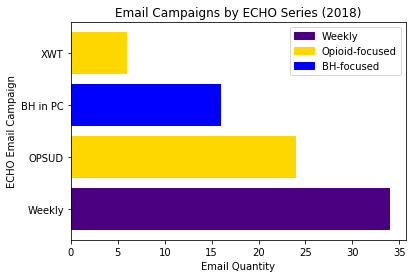

In [16]:
#Visualize Table #2 w/matplotlib for 2018 ONLY
series_totals_2018 = email_data_df.loc[(email_data_df['Date'] < '1/1/2019')].groupby(email_data_df['Series']).sum()

#add an additional column that counts the number of emails for each series
email_count_2018 = email_data_df.loc[(email_data_df['Date'] < '1/1/2019')].groupby(['Series'])['Title'].count()
series_totals_2018.insert(0, 'Email Count', email_count_2018)

#arrange the data in descending order
series_totals_2018 = series_totals_2018.sort_values(by='Email Count', ascending=False)

#visualize the 2018 data
email_count = series_totals_2018['Email Count']
series = list(series_totals_2018.index.values)

plt.barh(series, email_count, color=['indigo','gold','blue','gold'])
plt.title("Email Campaigns by ECHO Series (2018)")
plt.xlabel("Email Quantity")
plt.ylabel("ECHO Email Campaign")

#create a legend
indigo_patch = mpatches.Patch(color='indigo', label='Weekly')
gold_patch = mpatches.Patch(color='gold', label='Opioid-focused')
blue_patch = mpatches.Patch(color='blue', label='BH-focused')
plt.legend(handles=[indigo_patch, gold_patch, blue_patch])

plt.show()

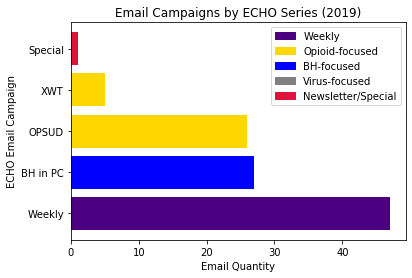

In [17]:
#Visualize Table #2 w/matplotlib for 2019 ONLY
series_totals_2019 = email_data_df.loc[email_data_df['Date'].between('12/31/2018', '1/1/2020')].groupby(email_data_df['Series']).sum()

#add an additional column that counts the number of emails for each series
email_count_2019 = email_data_df.loc[(email_data_df['Date'].between('12/31/2018', '1/1/2020'))].groupby(['Series'])['Title'].count()
series_totals_2019.insert(0, 'Email Count', email_count_2019)

#arrange the data in descending order
series_totals_2019 = series_totals_2019.sort_values(by='Email Count', ascending=False)

#visualize the 2019 data
email_count = series_totals_2019['Email Count']
series = list(series_totals_2019.index.values)

plt.barh(series, email_count, color=['indigo','blue','gold','gold', 'crimson'])
plt.title("Email Campaigns by ECHO Series (2019)")
plt.xlabel("Email Quantity")
plt.ylabel("ECHO Email Campaign")

#create a legend
indigo_patch = mpatches.Patch(color='indigo', label='Weekly')
gold_patch = mpatches.Patch(color='gold', label='Opioid-focused')
blue_patch = mpatches.Patch(color='blue', label='BH-focused')
crimson_patch = mpatches.Patch(color='crimson', label='Newsletter/Special')
plt.legend(handles=[indigo_patch, gold_patch, blue_patch, gray_patch, crimson_patch])

plt.show()

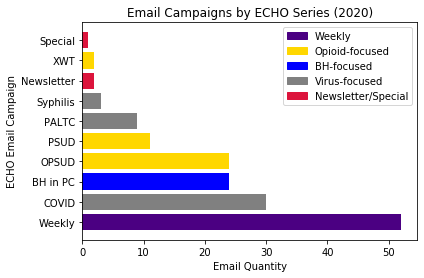

In [18]:
#Visualize Table #2 w/matplotlib for 2020 ONLY
series_totals_2020 = email_data_df.loc[email_data_df['Date'].between('12/31/2019', '1/1/2021')].groupby(email_data_df['Series']).sum()

#add an additional column that counts the number of emails for each series
email_count_2020 = email_data_df.loc[(email_data_df['Date'].between('12/31/2019', '1/1/2021'))].groupby(['Series'])['Title'].count()
series_totals_2020.insert(0, 'Email Count', email_count_2020)

#arrange the data in descending order
series_totals_2020 = series_totals_2020.sort_values(by='Email Count', ascending=False)

#visualize the 2020 data
email_count = series_totals_2020['Email Count']
series = list(series_totals_2020.index.values)

plt.barh(series, email_count, color=['indigo','gray','blue','gold','gold','gray','gray','crimson','gold','crimson'])
plt.title("Email Campaigns by ECHO Series (2020)")
plt.xlabel("Email Quantity")
plt.ylabel("ECHO Email Campaign")

#create a legend
indigo_patch = mpatches.Patch(color='indigo', label='Weekly')
gold_patch = mpatches.Patch(color='gold', label='Opioid-focused')
blue_patch = mpatches.Patch(color='blue', label='BH-focused')
gray_patch = mpatches.Patch(color='gray', label='Virus-focused')
crimson_patch = mpatches.Patch(color='crimson', label='Newsletter/Special')
plt.legend(handles=[indigo_patch, gold_patch, blue_patch, gray_patch, crimson_patch])

plt.show()

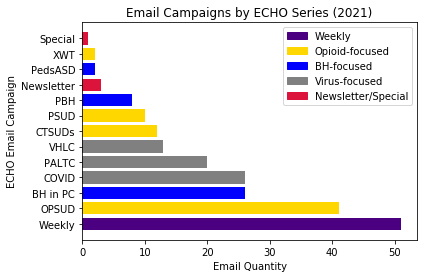

In [19]:
#Visualize Table #2 w/matplotlib for 2021 ONLY
series_totals_2021 = email_data_df.loc[email_data_df['Date'].between('12/31/2020', '1/1/2022')].groupby(email_data_df['Series']).sum()

#add an additional column that counts the number of emails for each series
email_count_2021 = email_data_df.loc[(email_data_df['Date'].between('12/31/2020', '1/1/2022'))].groupby(['Series'])['Title'].count()
series_totals_2021.insert(0, 'Email Count', email_count_2021)

#arrange the data in descending order
series_totals_2021 = series_totals_2021.sort_values(by='Email Count', ascending=False)

#visualize the 2021 data
email_count = series_totals_2021['Email Count']
series = list(series_totals_2021.index.values)

plt.barh(series, email_count, color=['indigo','gold','blue','gray','gray','gray','gold','gold','blue','crimson','blue','gold','crimson'])
plt.title("Email Campaigns by ECHO Series (2021)")
plt.xlabel("Email Quantity")
plt.ylabel("ECHO Email Campaign")

#create a legend
indigo_patch = mpatches.Patch(color='indigo', label='Weekly')
gold_patch = mpatches.Patch(color='gold', label='Opioid-focused')
blue_patch = mpatches.Patch(color='blue', label='BH-focused')
gray_patch = mpatches.Patch(color='gray', label='Virus-focused')
crimson_patch = mpatches.Patch(color='crimson', label='Newsletter/Special')
plt.legend(handles=[indigo_patch, gold_patch, blue_patch, gray_patch, crimson_patch])

plt.show()

In [20]:
#TABLE 3: A table of the total types of emails sent
#create a new dataframe that uses the email type as the index
type_totals_df = email_data_df.groupby(email_data_df['Type']).sum()

# add an additional column that counts the number of emails for each email type
type_count = email_data_df.groupby(['Type'])['Title'].count()
type_totals_df.insert(0, 'Email Count', type_count)

# # arrange the data in descending order
type_totals_df = type_totals_df.sort_values(by='Email Count', ascending=False)

# # show the table
type_totals_df

,Email Count,Total Recipients,Successful Deliveries,Total Bounces,Times Forwarded,Forwarded Opens,Unique Opens,Open Rate,Total Opens,Unique Clicks,Click Rate,Total Clicks,Unsubscribes,FB Likes,Visits,New Visits,Pages/Visit,Bounce Rate
Type,,,,,,,,,,,,,,,,,,
Daily,427,274679,273703,678.0,78.0,63.0,84242,145.64,188821,17901,42.70,52891,165,0.0,3249.0,1366.0,298.500422,81.82
Weekly,218,314856,313681,727.0,66.0,91.0,89927,69.35,192407,9966,11.18,29107,267,0.0,1960.0,663.0,207.592715,51.89
XWT Promo,14,11132,11026,67.0,3.0,4.0,2908,5.33,13460,228,0.85,837,17,0.0,309.0,155.0,17.126475,5.98
Special - General,13,7829,7786,23.0,0.0,0.0,2428,5.35,11489,368,1.20,1564,9,0.0,394.0,225.0,14.476329,4.79
Newsletter,10,17258,17205,19.0,0.0,0.0,4094,2.33,7758,543,0.32,1798,11,0.0,90.0,44.0,3.222222,0.60
Special - Series Launch/Re-Launch,10,16263,16154,27.0,0.0,0.0,4583,3.20,10649,447,0.57,1716,13,0.0,0.0,0.0,0.000000,0.00
Special - Series Finale/Follow-up,7,1729,1724,0.0,0.0,0.0,561,2.79,1053,48,0.73,194,2,0.0,0.0,0.0,0.000000,0.00
Special - Redaction,5,4262,4252,0.0,0.0,0.0,1270,1.77,2611,95,0.22,314,0,0.0,0.0,0.0,0.000000,0.00
Special - Guest Presenter,2,4234,4212,22.0,6.0,2.0,1046,0.51,2590,176,0.09,586,1,0.0,0.0,0.0,0.000000,0.00


In [21]:
#TABLE 4: Newsletter Data
#create a table showing the relevant newsletter data
Newsletter_df = email_data_df.loc[(email_data_df['Type'] == 'Newsletter')]
Newsletter_df = Newsletter_df.drop(['Type','Title'], axis=1)
Newsletter_df = Newsletter_df.sort_values(by="Date")
Newsletter_df = Newsletter_df.drop(242)
Newsletter_df

,Date,Weekday,Time,Series,Subject,Total Recipients,Successful Deliveries,Total Bounces,Times Forwarded,Forwarded Opens,...,Total Opens,Unique Clicks,Click Rate,Total Clicks,Unsubscribes,FB Likes,Visits,New Visits,Pages/Visit,Bounce Rate
233,2020-08-11,Tuesday,9:00:00,Newsletter,August 2020ECHO Idaho Newsletter,1238,1236,2.0,0.0,0.0,...,932,23,0.02,156,0,0.0,90.0,44.0,3.222222,0.6
234,2020-11-19,Thursday,6:00:00,Newsletter,November 2020 ECHO Idaho Newsletter,1357,1355,2.0,0.0,0.0,...,679,34,0.03,232,0,0.0,0.0,0.0,0.000000,0.0
235,2021-02-10,Wednesday,6:00:00,Newsletter,February 2021 ECHO Idaho Newsletter,1464,1459,5.0,0.0,0.0,...,799,49,0.03,102,2,0.0,0.0,0.0,0.000000,0.0
236,2021-05-11,Tuesday,7:00:00,Newsletter,May 2021 ECHO Idaho Newsletter,1546,1540,6.0,0.0,0.0,...,507,43,0.03,103,0,0.0,0.0,0.0,0.000000,0.0
237,2021-11-10,Wednesday,7:00:00,Newsletter,November 2021 ECHO Idaho Newsletter,1729,1726,0.0,0.0,0.0,...,524,58,0.03,153,0,0.0,0.0,0.0,0.000000,0.0
238,2022-01-20,Thursday,4:00:00,Newsletter,January 2022 ECHO Idaho Newsletter,1980,1974,0.0,0.0,0.0,...,1024,78,0.04,496,3,0.0,0.0,0.0,0.000000,0.0
239,2022-03-10,Thursday,5:30:00,Newsletter,March 2022 ECHO Idaho Newsletter,2045,2042,0.0,0.0,0.0,...,806,116,0.06,177,0,0.0,0.0,0.0,0.000000,0.0
240,2022-05-11,Wednesday,6:00:00,Newsletter,May 2022 ECHO Idaho Newsletter,2106,2091,0.0,0.0,0.0,...,868,57,0.03,179,2,0.0,0.0,0.0,0.000000,0.0
241,2022-07-13,Wednesday,7:00:00,Newsletter,July 2022 ECHO Idaho Newsletter,2207,2200,0.0,0.0,0.0,...,1134,43,0.02,106,1,0.0,0.0,0.0,0.000000,0.0


C:\Users\ssteffen\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\ssteffen\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\ssteffen\Anaconda3\envs\PythonData\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas w

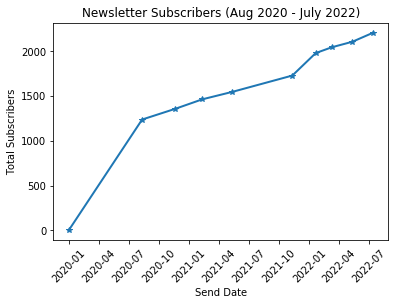

In [22]:
#Plot Newsletter date and recipients subscribed recipients by date (2018-2022)

#create a new df of the data to be plotted
Newsletter_recips = Newsletter_df[['Date', 'Total Recipients']]

#add a zero date and term to the data to be plotted
Newsletter_recips.loc[len(Newsletter_recips.index)] = ['2020-1-1', 0] 

#change the datatype to a dt
Newsletter_recips['Date'] = pd.to_datetime(Newsletter_recips['Date'], format='%Y/%m/%d')

#sort the df by date
Newsletter_recips_sorted = Newsletter_recips.sort_values(by='Date')

# set the x and y axis to data variables
x_axis = Newsletter_recips_sorted['Date']
y_axis = Newsletter_recips_sorted['Total Recipients']

plt.plot(x_axis,y_axis, linewidth=2, marker='*')
plt.title('Newsletter Subscribers (Aug 2020 - July 2022)')
plt.xlabel('Send Date')
plt.ylabel('Total Subscribers')
plt.xticks(rotation = 45)
plt.show()

In [23]:
# TABLE 5: A table illustrating the TOD as bins and open/click data for each series
#create a new row in the email_data_df called "Times" that converts the "Time" column to a datetime data type
email_data_df['Times'] = pd.to_datetime(email_data_df['Time'], format='%H:%M:%S').dt.time
email_data_df['Times'].describe()

#make time bins!!!
# bins = [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

count          708
unique         114
top       06:00:00
freq           411
Name: Times, dtype: object